9.200000000000001
2.4799999999999986
6.512000000000001
4.092799999999999
5.544320000000001
4.673407999999999
5.1959552
4.88242688
5.070543872
4.9576736768


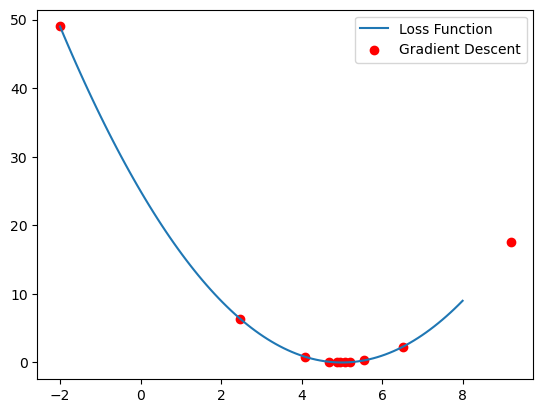

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 손실 함수 정의
def loss_function(x):
    return (x-5)**2

# 경사 하강법 함수 정의
def gradient_descent(x_start, learning_rate, n_iters):
    x = x_start
    history = [x]  # 각 단계에서 x의 값을 저장

    for i in range(n_iters):
        gradient = 2*(x-5)  # 손실 함수의 미분
        x = x - learning_rate*gradient  # 경사 하강법 업데이트
        print(x)
        history.append(x)

    return history

# 시작점, 학습률, 반복 횟수 설정
x_start = -2
learning_rate = 0.8
n_iters = 10

# 경사 하강법 수행
history = gradient_descent(x_start, learning_rate, n_iters)

# 손실 함수와 경사 하강법 경로 그리기
x = np.linspace(-2, 8, 100)
y = loss_function(x)

plt.plot(x, y, label='Loss Function')
plt.scatter(history, [loss_function(x) for x in history], color='red', label='Gradient Descent')
plt.legend()
plt.show()


9.200000000000001
2.4799999999999986
6.512000000000001
4.092799999999999
5.544320000000001
4.673407999999999
5.1959552
4.88242688
5.070543872
4.9576736768


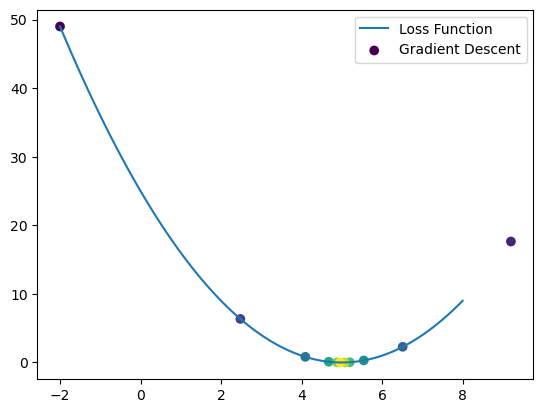

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 손실 함수 정의
def loss_function(x):
    return (x-5)**2

# 경사 하강법 함수 정의
def gradient_descent(x_start, learning_rate, n_iters):
    x = x_start
    history = [x]  # 각 단계에서 x의 값을 저장

    for i in range(n_iters):
        gradient = 2*(x-5)  # 손실 함수의 미분
        x = x - learning_rate*gradient  # 경사 하강법 업데이트
        print(x)
        history.append(x)

    return history

# 시작점, 학습률, 반복 횟수 설정
x_start = -2
learning_rate = 0.8
n_iters = 10

# 경사 하강법 수행
history = gradient_descent(x_start, learning_rate, n_iters)

# 손실 함수와 경사 하강법 경로 그리기
x = np.linspace(-2, 8, 100)
y = loss_function(x)

plt.plot(x, y, label='Loss Function')

# 각 단계에서의 점에 대한 색상을 시간에 따라 변경
colors = plt.cm.viridis(np.linspace(0, 1, len(history)))
plt.scatter(history, [loss_function(x) for x in history], color=colors, label='Gradient Descent')

plt.legend()
plt.show()


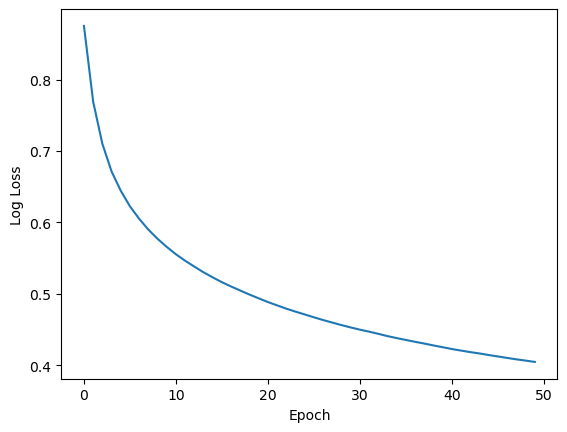

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss

# 데이터 준비
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# 데이터 표준화
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# SGDClassifier 초기화
sgd = SGDClassifier(loss='log_loss', max_iter=1, warm_start=True, learning_rate='constant', eta0=0.01)

# 손실 저장을 위한 빈 리스트
losses = []

# 에폭 수 설정
n_epochs = 50

# 에폭에 따른 학습
for epoch in range(n_epochs):
    sgd.partial_fit(X_train_std, y_train, classes=np.unique(y))
    y_prob = sgd.predict_proba(X_train_std)
    loss = log_loss(y_train, y_prob)
    losses.append(loss)

# 손실 그래프 그리기
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.show()


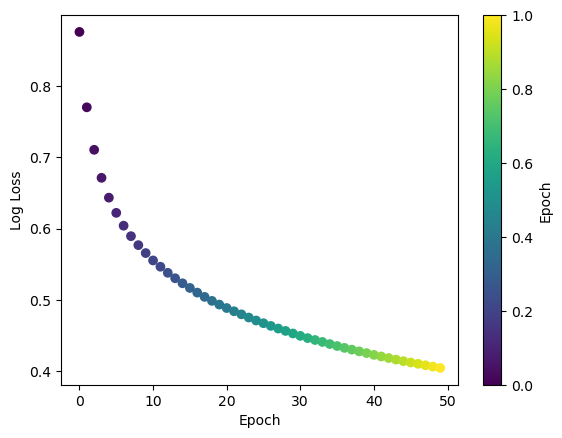

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss

# 데이터 준비
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# 데이터 표준화
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# SGDClassifier 초기화
sgd = SGDClassifier(loss='log_loss', max_iter=1, warm_start=True, learning_rate='constant', eta0=0.01)

# 손실 저장을 위한 빈 리스트
losses = []

# 에폭 수 설정
n_epochs = 50

# 에폭에 따른 학습
for epoch in range(n_epochs):
    sgd.partial_fit(X_train_std, y_train, classes=np.unique(y))
    y_prob = sgd.predict_proba(X_train_std)
    loss = log_loss(y_train, y_prob)
    losses.append(loss)

# 손실 그래프 그리기
plt.scatter(range(n_epochs), losses, c=plt.cm.viridis(np.linspace(0, 1, n_epochs)))
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.colorbar(label='Epoch')
plt.show()
